# Scenarios
To demonstrate the use of this simulator, here is a Jupyter Notebook that performs a three scenarios involving specific tasks.

Before getting started, however, make sure to run the following code block in order to import the necessary packages and classes.

In [33]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/Users/griffinmccauley/Documents/MSDS/DS5100/DS5100-Final-Project')
from montecarlo.montecarlo import Die, Game, Analyzer

## Scenario 1: A 2-headed coin

#### 1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [34]:
fair_coin = Die(['H', 'T'])
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)

#### 2. Play a game of 1000 flips of three coins with all fair dice.

In [35]:
fair_game = Game([fair_coin, fair_coin, fair_coin])
fair_game.play(1000)

#### 3. Play a game of 1000 flips with two unfair dice and one fair die.

In [36]:
unfair_game = Game([fair_coin, unfair_coin, unfair_coin])
unfair_game.play(1000)

#### 4. For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
##### (5. Compute relative frequency as the number of jackpots over the total number of rolls.)

In [41]:
fair_analyzer = Analyzer(fair_game)
relative_fair_frequency = fair_analyzer.jackpot()/1000
print('Relative fair frequency:', relative_fair_frequency)

Relative fair frequency: 0.264


In [42]:
expected_fair_frequency = 2*(1/2)**3
print('Expected fair frequency:', expected_fair_frequency)

Expected fair frequency: 0.25


In [45]:
unfair_analyzer = Analyzer(unfair_game)
relative_unfair_frequency = unfair_analyzer.jackpot()/1000
print('Relative unfair frequency:', relative_unfair_frequency)

Relative unfair frequency: 0.363


In [44]:
expected_unfair_frequency = (1/2)*(5/6)*(5/6) + (1/2)*(1/6)*(1/6)
print('Expected unfair frequency;', expected_unfair_frequency)

Expected unfair frequency; 0.36111111111111116


#### 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

## Scenario 2

### 1.

In [11]:
fair_die = Die([1, 2, 3, 4, 5, 6])
unfair_die_type1 = Die([1, 2, 3, 4, 5, 6])
unfair_die_type1.change_weight(6, 5)
unfair_die_type2 = Die([1, 2, 3, 4, 5, 6])
unfair_die_type2.change_weight(1, 5)

### 2.

In [12]:
fair_game = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_game.play(10000)

12.807821035385132


### 3.

In [17]:
unfair_game = Game([unfair_die_type1, unfair_die_type1, unfair_die_type2, fair_die, fair_die])
unfair_game.play(10000)

### 4.

In [29]:
fair_analyzer = Analyzer(fair_game)
fair_jackpots = fair_analyzer.jackpot()
relative_fair_frequency = fair_jackpots/10000
print(relative_fair_frequency)
expected_fair_frequency = (1/6)**4
print(expected_fair_frequency)

0.0006
0.0007716049382716048


In [18]:
unfair_analyzer = Analyzer(unfair_game)
unfair_jackpots = unfair_analyzer.jackpot()
relative_unfair_frequency = unfair_jackpots/10000
print(relative_unfair_frequency)
expected_unfair_frequency = ((1/10)*(1/10)*(1/2)*(1/6)*(1/6)) + ((1/10)*(1/10)*(1/10)*(1/6)*(1/6)) + \
((1/10)*(1/10)*(1/10)*(1/6)*(1/6)) + ((1/10)*(1/10)*(1/10)*(1/6)*(1/6)) + ((1/10)*(1/10)*(1/10)*(1/6)*(1/6)) + \
((1/2)*(1/2)*(1/10)*(1/6)*(1/6))
print(expected_unfair_frequency)

0.0011
0.0009444444444444444


<AxesSubplot:>

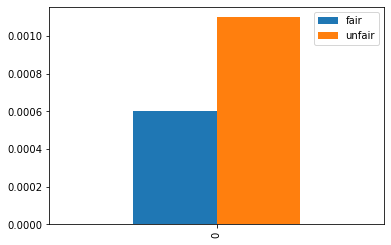

In [32]:
pd.DataFrame({'fair': [relative_fair_frequency], 'unfair': [relative_unfair_frequency]}).plot.bar()

### 5.

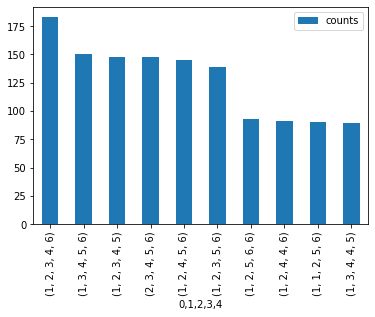

In [28]:
fair_analyzer.combo()
fair_analyzer.combos[:10].plot.bar();

<AxesSubplot:xlabel='0,1,2,3,4'>

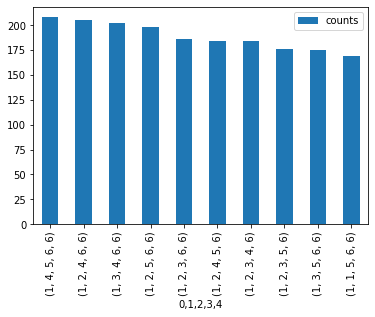

In [27]:
unfair_analyzer.combo()
unfair_analyzer.combos[:10].plot.bar();

## Scenario 3

In [28]:
letter_freqs = pd.read_csv('/Users/griffinmccauley/Documents/MSDS/DS5100/DS5100-Final-Project/letter-freqs.csv', sep = '\t', header = None)
letters = [letter_freqs.iloc[i][0] for i in range(len(letter_freqs))]
die = Die(letters)
for i in range(len(letter_freqs)):
    die.change_weight(letter_freqs.iloc[i][0], letter_freqs.iloc[i][1])

In [31]:
game = Game([die, die, die, die, die])
game.play(1000)
print(game.show_result().to_string())

die_number   0  1  2  3  4
roll_number               
1            D  A  I  L  I
2            N  E  O  C  G
3            I  C  L  R  E
4            U  C  G  I  E
5            I  T  O  O  I
6            H  K  T  O  H
7            F  K  I  H  I
8            P  O  R  D  D
9            I  C  K  C  S
10           E  B  P  E  L
11           I  T  E  L  A
12           S  N  M  P  O
13           O  T  M  C  H
14           C  K  I  R  R
15           M  P  O  E  M
16           I  N  O  S  I
17           K  S  I  S  S
18           C  S  N  A  K
19           I  A  A  E  L
20           U  E  S  U  D
21           N  I  H  E  V
22           L  E  L  S  L
23           O  O  S  L  A
24           A  O  E  Y  H
25           I  E  L  R  C
26           O  O  I  R  R
27           E  T  N  R  O
28           C  C  E  I  F
29           Y  L  I  E  R
30           D  L  R  L  T
31           R  L  I  E  L
32           S  I  A  T  L
33           Z  M  M  A  O
34           E  O  C  E  S
35           A  N  P  T  L
3